<a href="https://colab.research.google.com/github/joohoshin/Python_Basic/blob/master/18_1_%EB%A1%9C%EB%98%90_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random 활용
* 7강에서 해봤던 로또 분석을 numpy와 pandas를 활용해서 만들어봅시다. 

In [ ]:
import numpy as np
import pandas as pd

# numpy로 1만건 로또 번호를 생성해봅시다. 
trials = 10000
data = np.random.choice(range(1,46), (trials, 6))

In [ ]:
data

array([[10, 34, 23, 43, 38, 45],
       [22, 44, 22, 12, 43,  9],
       [ 8, 24,  4,  7, 21, 22],
       ...,
       [12, 35,  5, 37, 40, 32],
       [42, 36, 25, 40, 16,  2],
       [11, 45, 18, 31, 35, 42]])

In [ ]:
data.shape

(10000, 6)

* 데이터프레임으로 변환해봅시다

In [ ]:
df = pd.DataFrame(data, columns = [1,2,3,4,5,6])

In [ ]:
df

,1,2,3,4,5,6
0,10,34,23,43,38,45
1,22,44,22,12,43,9
2,8,24,4,7,21,22
3,44,37,28,25,30,26
4,2,1,25,30,39,2
...,...,...,...,...,...,...
9995,2,6,24,17,35,42
9996,18,26,32,3,6,7
9997,12,35,5,37,40,32
9998,42,36,25,40,16,2


* 당첨번호를 하나 생성합니다. 

In [ ]:
win = np.random.choice(range(1,45), 6)

In [ ]:
win

array([ 5, 41, 43, 35, 38,  5])

* 몇개 맞추었는지 비교하는 함수를 만듭니다. 

In [ ]:
def count(win, trial):
    win_set = set(win)
    trial_set = set(trial.tolist())
    n_correct = len(win_set & trial_set)
    return n_correct

* pandas에 적용해봅시다

In [ ]:
result = df.apply(lambda row: count(win, row), axis = 1)

In [ ]:
result

0       2
1       1
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    2
9998    0
9999    1
Length: 10000, dtype: int64

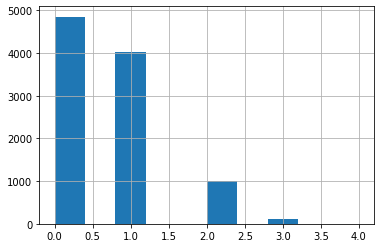

In [ ]:
result.hist()

In [ ]:
count = result.value_counts()

In [ ]:
count

0    4254
1    4146
2    1387
3     198
4      15
dtype: int64

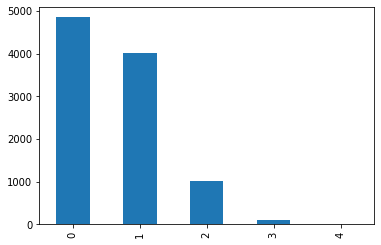

In [ ]:
count.plot.bar()

* 5개 6개 0개일때도 추가를 해봅시다

In [ ]:
for i in range(len(count), 7):
    count[i]=0

In [ ]:
count

0    4851
1    4024
2    1009
3     112
4       4
5       0
6       0
dtype: int64

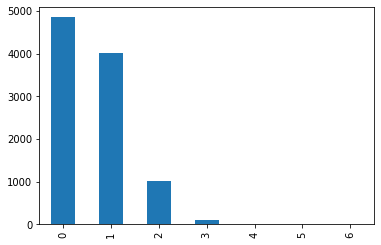

In [ ]:
count.plot.bar()

* 인덱스 명을 등수로 바꿔봅시다

In [ ]:
count.index = ['7th', '6th', '5th', '4th', '3rd', '2nd', '1st']

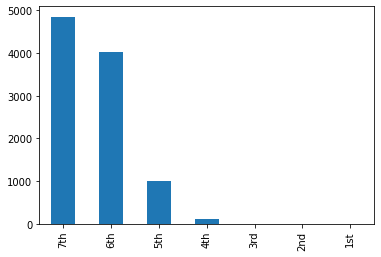

In [ ]:
count.plot.bar()

In [ ]:
count

7th    4254
6th    4146
5th    1387
4th     198
3rd      15
2nd       0
1st       0
dtype: int64

### 간략히 정리해봅시다

7th    423481
6th    418441
5th    137984
4th     19008
3rd      1072
2nd        14
1st         0
dtype: int64


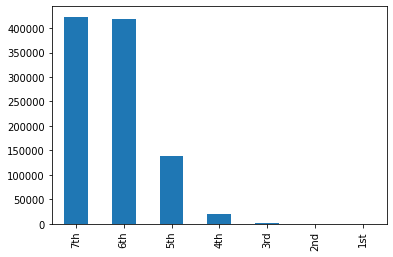

In [ ]:
import numpy as np
import pandas as pd

# numpy로 로또 번호를 생성해봅시다. 
trials = 1000000
data = np.random.choice(range(1,46), (trials, 6))
df = pd.DataFrame(data, columns = [1,2,3,4,5,6])

win = np.random.choice(range(1,45), 6)

def count(win, trial):
    win_set = set(win)
    trial_set = set(trial.tolist())
    n_correct = len(win_set & trial_set)
    return n_correct

result = df.apply(lambda row: count(win, row), axis = 1)
count = result.value_counts()

for i in range(len(count), 7):
    count[i]=0

count.index = ['7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
print(count)
count.plot.bar()

